In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


In [2]:
#import csv file
data=pd.read_csv("/Users/ioanahancu/Desktop/Food_Inspections.csv")

In [3]:
data.head()

Inspection ID                    DBA Name                  AKA Name  \
0        2345928    ALBANY CHILD CARE CENTER  ALBANY CHILD CARE CENTER   
1        2240486  TAMALES EMMA LA CHAPARRITA             LA CHAPARRITA   
2        2078297                  CHARTWELLS      MANSUETO HIGH SCHOOL   
3        2369894     JIMMY'S FOOD & DELI,INC       JIMMY'S FOOD & DELI   
4        2184537            MYSORE WOODLANDS          MYSORE WOODLANDS   

   License #                    Facility Type             Risk  \
0  2215697.0  Daycare Above and Under 2 Years    Risk 1 (High)   
1  2501598.0                       Restaurant    Risk 1 (High)   
2  2549059.0              HIGH SCHOOL KITCHEN    Risk 1 (High)   
3  2511672.0                    Grocery Store  Risk 2 (Medium)   
4  2229409.0                       Restaurant    Risk 1 (High)   

                 Address     City State      Zip Inspection Date  \
0      5954 S ALBANY AVE  CHICAGO    IL  60629.0      11/19/2019   
1      2500 S WHIPPLE ST  CHICAGO    IL  60623.0      11/20/2018   
2      2911 W W 47TH ST   CHICAGO    IL  60632.0      08/11/2017   
3      5601 W MADISON ST  CHICAGO    IL  60644.0      04/29/2020   
4  2548-2550 W DEVON AVE  CHICAGO    IL  60659.0      07/12/2018   

  Inspection Type             Results  \
0         Canvass                Pass   
1       Complaint                Fail   
2         License                Pass   
3         Canvass                Fail   
4         Canvass  Pass w/ Conditions   

                                          Violations   Latitude  Longitude  \
0  55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...  41.784667 -87.701011   
1  1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...  41.846288 -87.701562   
2                                                NaN        NaN        NaN   
3  3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...  41.880135 -87.764942   
4  3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...  41.997765 -87.694284   

                                   Location  
0   (41.784667360966026, -87.7010111792713)  
1  (41.846287752477586, -87.70156191989919)  
2                                       NaN  
3   (41.880135062255434, -87.7649424467103)  
4    (41.9977653535896, -87.69428406894727)

In [4]:
#look at the number or rows and columns in the dataset
print(data.shape)

(208254, 17)


In [5]:
#check if there are any null values
data.isnull().values.any()

True

In [6]:
#view all the columns that have null values
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

AKA Name            2479
License #             17
Facility Type       4861
Risk                  73
City                 150
State                 48
Zip                   50
Inspection Type        1
Violations         55325
Latitude             688
Longitude            688
Location             688
dtype: int64

In [7]:
#look at specific column that have nulls
print(data[data["License #"].isnull()][null_columns])

                               AKA Name  License #  \
18504              ST. DEMETRIOS CHURCH        NaN   
34322              ST. DEMETRIOS CHURCH        NaN   
44385              ST. DEMETRIOS CHURCH        NaN   
46658   GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
46802                   ARGENTINA FOODS        NaN   
58588              ST. DEMETRIOS CHURCH        NaN   
87997   GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
99520              ST. DEMETRIOS CHURCH        NaN   
115407         OLD ST. PATRICK'S CHURCH        NaN   
131995                              NaN        NaN   
151006         OLD ST. PATRICK'S CHURCH        NaN   
152958             ST. DEMETRIOS CHURCH        NaN   
156206  GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
173769                              NaN        NaN   
182102             ST. DEMETRIOS CHURCH        NaN   
184207             ST. DEMETRIOS CHURCH        NaN   
192512             ST. DEMETRIOS CHURCH        NaN   

                      Facil

In [8]:
# filter the dataset by facility type =restaurant and look at its shape
restaurant_data = data[data['Facility Type']=="Restaurant"]
print(restaurant_data.shape)

(138590, 17)


In [9]:
restaurant_data.head()

Inspection ID                      DBA Name                      AKA Name  \
1         2240486    TAMALES EMMA LA CHAPARRITA                 LA CHAPARRITA   
4         2184537              MYSORE WOODLANDS              MYSORE WOODLANDS   
8         2240666  ORANGE GARDEN RESTAURANT LLC  ORANGE GARDEN RESTAURANT LLC   
9         2280082         BEERHEAD BAR & EATERY         BEERHEAD BAR & EATERY   
10        2370625                THE CREPE SHOP                THE CREPE SHOP   

    License # Facility Type           Risk                Address     City  \
1   2501598.0    Restaurant  Risk 1 (High)      2500 S WHIPPLE ST  CHICAGO   
4   2229409.0    Restaurant  Risk 1 (High)  2548-2550 W DEVON AVE  CHICAGO   
8   1942679.0    Restaurant  Risk 1 (High)  1942 W IRVING PARK RD  CHICAGO   
9   2600994.0    Restaurant  Risk 1 (High)        3519 N CLARK ST  CHICAGO   
10  2699005.0    Restaurant  Risk 1 (High)        2934 N BROADWAY  CHICAGO   

   State      Zip Inspection Date Inspection Type             Results  \
1     IL  60623.0      11/20/2018       Complaint                Fail   
4     IL  60659.0      07/12/2018         Canvass  Pass w/ Conditions   
8     IL  60613.0      11/27/2018         Canvass  Pass w/ Conditions   
9     IL  60657.0      03/26/2019         License                Pass   
10    IL  60657.0      05/15/2020         Canvass                Pass   

                                           Violations   Latitude  Longitude  \
1   1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...  41.846288 -87.701562   
4   3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...  41.997765 -87.694284   
8   3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...  41.954276 -87.678033   
9   55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...  41.946281 -87.655603   
10  37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...  41.935930 -87.644407   

                                    Location  
1   (41.846287752477586, -87.70156191989919)  
4     (41.9977653535896, -87.69428406894727)  
8    (41.954276019666246, -87.6780332991192)  
9    (41.94628081101039, -87.65560312808297)  
10   (41.93592957402078, -87.64440716256712)

In [10]:
# we want to keep just the restaurants where we know the location, so we keep just the rows where location is not NaN:
restaurants_df = restaurant_data[restaurant_data['Location'].notna()]
restaurants_df.head()

Inspection ID                      DBA Name                      AKA Name  \
1         2240486    TAMALES EMMA LA CHAPARRITA                 LA CHAPARRITA   
4         2184537              MYSORE WOODLANDS              MYSORE WOODLANDS   
8         2240666  ORANGE GARDEN RESTAURANT LLC  ORANGE GARDEN RESTAURANT LLC   
9         2280082         BEERHEAD BAR & EATERY         BEERHEAD BAR & EATERY   
10        2370625                THE CREPE SHOP                THE CREPE SHOP   

    License # Facility Type           Risk                Address     City  \
1   2501598.0    Restaurant  Risk 1 (High)      2500 S WHIPPLE ST  CHICAGO   
4   2229409.0    Restaurant  Risk 1 (High)  2548-2550 W DEVON AVE  CHICAGO   
8   1942679.0    Restaurant  Risk 1 (High)  1942 W IRVING PARK RD  CHICAGO   
9   2600994.0    Restaurant  Risk 1 (High)        3519 N CLARK ST  CHICAGO   
10  2699005.0    Restaurant  Risk 1 (High)        2934 N BROADWAY  CHICAGO   

   State      Zip Inspection Date Inspection Type             Results  \
1     IL  60623.0      11/20/2018       Complaint                Fail   
4     IL  60659.0      07/12/2018         Canvass  Pass w/ Conditions   
8     IL  60613.0      11/27/2018         Canvass  Pass w/ Conditions   
9     IL  60657.0      03/26/2019         License                Pass   
10    IL  60657.0      05/15/2020         Canvass                Pass   

                                           Violations   Latitude  Longitude  \
1   1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...  41.846288 -87.701562   
4   3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...  41.997765 -87.694284   
8   3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...  41.954276 -87.678033   
9   55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...  41.946281 -87.655603   
10  37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...  41.935930 -87.644407   

                                    Location  
1   (41.846287752477586, -87.70156191989919)  
4     (41.9977653535896, -87.69428406894727)  
8    (41.954276019666246, -87.6780332991192)  
9    (41.94628081101039, -87.65560312808297)  
10   (41.93592957402078, -87.64440716256712)

In [11]:
#find out how many unique zip codes we have in our dataset:
len(restaurants_df['Zip'].unique().tolist())

60

In [12]:
#double-check there are no more null values in the "location" column
null_columns=restaurants_df.columns[restaurants_df.isnull().any()]
data[null_columns].isnull().sum()

AKA Name            2479
Risk                  73
City                 150
State                 48
Zip                   50
Inspection Type        1
Violations         55325
dtype: int64

In [37]:
# Export the restaurants data into a csv. i've comment this out because I don't want to save the file multiple times on my machine
#restaurants_df.to_csv("Restaurants.csv")

In [16]:
#look at how many unique restaurants, based on location
len(restaurants_df['Location'].unique().tolist())

9523

In [13]:
# eliminate restaurants that are "out of business" or "business not located"
clean_data

Inspection ID                      DBA Name  \
1             2240486    TAMALES EMMA LA CHAPARRITA   
4             2184537              MYSORE WOODLANDS   
8             2240666  ORANGE GARDEN RESTAURANT LLC   
9             2280082         BEERHEAD BAR & EATERY   
10            2370625                THE CREPE SHOP   
...               ...                           ...   
208246        2363192           HONKY TONK BARBEQUE   
208250        1559555              JOHNNY'S GRILL I   
208251        2353163   LA MICHOACANA DE MARTHA LLC   
208252        1751404  RAYMOND'S HAMBURGERS & TACOS   
208253        1383219               BAR CASA BLANCA   

                            AKA Name  License # Facility Type  \
1                      LA CHAPARRITA  2501598.0    Restaurant   
4                   MYSORE WOODLANDS  2229409.0    Restaurant   
8       ORANGE GARDEN RESTAURANT LLC  1942679.0    Restaurant   
9              BEERHEAD BAR & EATERY  2600994.0    Restaurant   
10                    THE CREPE SHOP  2699005.0    Restaurant   
...                              ...        ...           ...   
208246           HONKY TONK BARBEQUE  1987119.0    Restaurant   
208250              JOHNNY'S GRILL I  2368611.0    Restaurant   
208251   LA MICHOACANA DE MARTHA LLC  2303641.0    Restaurant   
208252  RAYMOND'S HAMBURGERS & TACOS    26528.0    Restaurant   
208253               BAR CASA BLANCA     9246.0    Restaurant   

                   Risk                  Address     City State      Zip  \
1         Risk 1 (High)        2500 S WHIPPLE ST  CHICAGO    IL  60623.0   
4         Risk 1 (High)    2548-2550 W DEVON AVE  CHICAGO    IL  60659.0   
8         Risk 1 (High)    1942 W IRVING PARK RD  CHICAGO    IL  60613.0   
9         Risk 1 (High)          3519 N CLARK ST  CHICAGO    IL  60657.0   
10        Risk 1 (High)          2934 N BROADWAY  CHICAGO    IL  60657.0   
...                 ...                      ...      ...   ...      ...   
208246    Risk 1 (High)        1800 S RACINE AVE  CHICAGO    IL  60608.0   
208250    Risk 1 (High)  2545-2547 N KEDZIE BLVD  CHICAGO    IL  60647.0   
208251  Risk 2 (Medium)    4346 S California AVE  CHICAGO    IL  60632.0   
208252    Risk 1 (High)   2404 S BLUE ISLAND AVE  CHICAGO    IL  60608.0   
208253    Risk 1 (High)         1158 W GRAND AVE  CHICAGO    IL  60642.0   

       Inspection Date        Inspection Type             Results  \
1           11/20/2018              Complaint                Fail   
4           07/12/2018                Canvass  Pass w/ Conditions   
8           11/27/2018                Canvass  Pass w/ Conditions   
9           03/26/2019                License                Pass   
10          05/15/2020                Canvass                Pass   
...                ...                    ...                 ...   
208246      03/03/2020              Complaint                Pass   
208250      06/25/2015                License                Pass   
208251      12/11/2019                Canvass  Pass w/ Conditions   
208252      04/05/2016  Canvass Re-Inspection                Pass   
208253      11/08/2013                Canvass                Fail   

                                               Violations   Latitude  \
1       1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...  41.846288   
4       3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...  41.997765   
8       3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...  41.954276   
9       55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...  41.946281   
10      37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...  41.935930   
...                                                   ...        ...   
208246                                                NaN  41.857882   
208250  32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...  41.927879   
208251  3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...  41.814161   
208252  35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...  41.848781   
208253  18. NO EVIDENCE OF RODEN

In [14]:
#find out how many unique restaurant locations we have in our dataset:
len(clean_data['Location'].unique().tolist())

9380

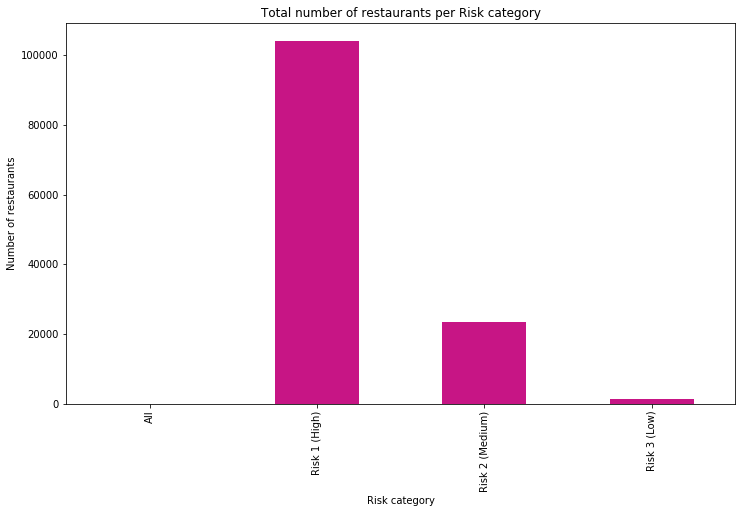

<Figure size 432x288 with 0 Axes>

In [28]:
# Generate a bar plot showing the total number of restaurants for each Risk category 

#First, we use groupby "risk category" and count location to determine the data points
risk_data_points = clean_data.groupby(["Risk"]).count()["Location"]
risk_data_points

#Second, we plot the points
risk_data_points.plot(kind="bar", color="mediumvioletred", figsize=(12,7))

#Last, we set chart title and axis labels
plt.title("Total number of restaurants per Risk category")
plt.xlabel("Risk category")
plt.ylabel("Number of restaurants")

#show chart and set layout
plt.show()
plt.tight_layout()

In [18]:
#We can see that most restaurants are at high risk. We can also confirm this from the data:
clean_data['Risk'].value_counts()

Risk 1 (High)      103971
Risk 2 (Medium)     23467
Risk 3 (Low)         1350
All                     8
Name: Risk, dtype: int64

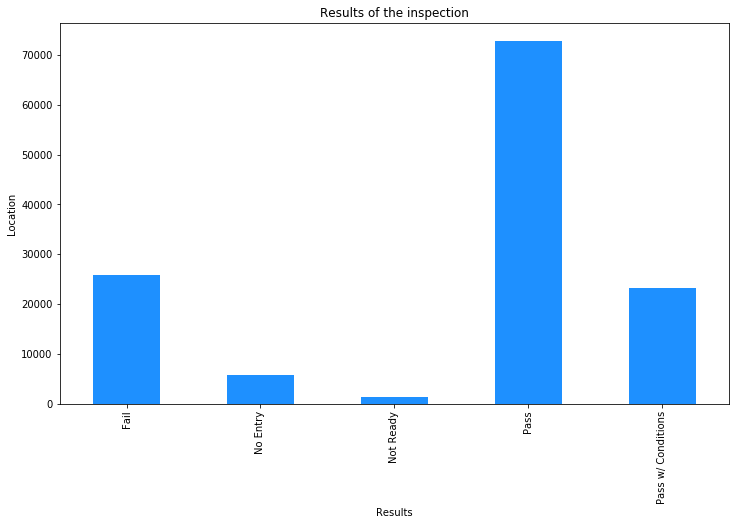

<Figure size 432x288 with 0 Axes>

In [27]:
#Next, we look at the results of the inspections

#First, we use groupby "Results" and count location to determine the data points
risk_data_points = clean_data.groupby(["Results"]).count()["Location"]
risk_data_points

#Second, we plot the points
risk_data_points.plot(kind="bar", color="dodgerblue", figsize=(12,7))

#Last, we set chart title and axis labels
plt.title("Results of the inspection")
plt.xlabel("Results")
plt.ylabel("Location")

#show chart and set layout
plt.show()
plt.tight_layout()

In [25]:
#confirm from the data:
clean_data['Results'].value_counts()

Pass                  72792
Fail                  25735
Pass w/ Conditions    23220
No Entry               5678
Not Ready              1374
Name: Results, dtype: int64